In [1]:
from infopath.model_loader import load_model_and_optimizer
from infopath.config import load_training_opt
import utils.display as display
import numpy as np
import matplotlib.pyplot as plt
import torch 
from utils.signature import lead_matrix

%load_ext autoreload
%autoreload 2

log_path = "log_dir/trained_models/main_model/"
opt = load_training_opt(log_path)
opt.log_path = log_path
opt.device = "cpu"
model = load_model_and_optimizer(opt, reload=True, last_best="last")[0]

C:\Users\arthu\Desktop\PHD\projects\trial-matching\utils\logger.py:272: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load(model_path, map_location=training_opt.device

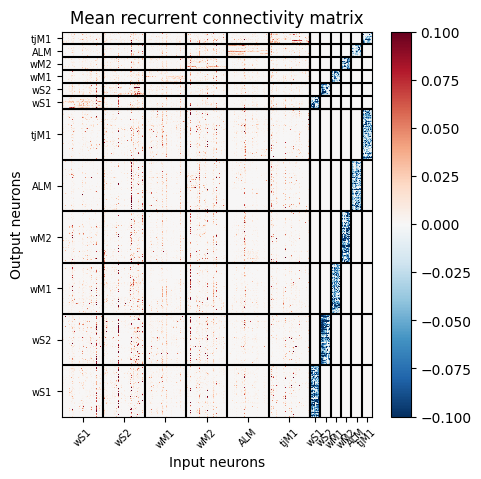

In [2]:
# Plot the mean recurrent connectivity matrix 
w_rec = model.rsnn._w_rec.detach().mean(0)
# Here all weights are positive, because the sign is calculated when we compute the currents.
#   That's why we multiply by -1 to have inhibitory weights in blue.
sign_mask = torch.ones(w_rec.shape)
sign_mask[:, -model.rsnn.inhibitory:] = -1 
w_rec = w_rec * sign_mask

w_rec = w_rec.numpy()
plt.figure(figsize=(5, 5))
plt.pcolormesh(w_rec, cmap="RdBu_r", vmin=-0.1, vmax=0.1)
plt.colorbar()
plt.title("Mean recurrent connectivity matrix")
plt.xlabel("Input neurons")
plt.ylabel("Output neurons")
# lines separate the different populations, first 1200 neurons are excitatory and last 300 are inhibitory
for i in range(200, 1400, 200):
    plt.axvline(i, color="k")
    plt.axhline(i, color="k")
for i in range(1200, 1500, 50):
    plt.axvline(i, color="k")
    plt.axhline(i, color="k")
# put the name of areas as a x label on the plot {wS1, wS2, wM1, wM2, ALM, tjM1}
xticks = [100, 300, 500, 700, 900, 1100, 1225, 1275, 1325, 1375, 1425, 1475]
xlabels = ["wS1", "wS2", "wM1", "wM2", "ALM", "tjM1"] * 2
plt.xticks(xticks, xlabels, rotation=45, fontsize=7)
plt.yticks(xticks, xlabels, fontsize=7)
plt.savefig("weights.png", dpi=300, bbox_inches="tight")

In [5]:
with torch.no_grad():
    stims = torch.randint(2, size=(10,)) # binary vector of conditions (absence or presence of whisker stimulation)
    spikes, voltages, jaw, state = model(stims) # generation of the input spikes and simulation of the RSNN

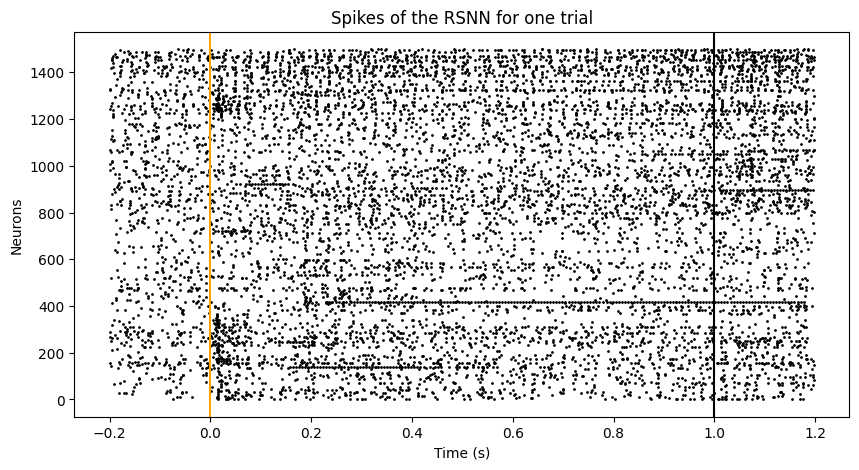

In [6]:
# here we plot the spikes of the neurons of the RSNN for one trial
plt.figure(figsize=(10, 5))
time = torch.arange(0, spikes.shape[1])*0.002 # time vector
sptms, sptns = torch.where(spikes[:,0] == 1) # indices of the spikes
plt.scatter(sptms*0.002-0.2, sptns, s=1, c="k")
plt.xlabel("Time (s)")
plt.ylabel("Neurons")
plt.title("Spikes of the RSNN for one trial")
plt.axvline(0, color="orange")
plt.axvline(1, color="k")
plt.savefig("spikes.png", dpi=300, bbox_inches="tight")

In [9]:
time = torch.arange(0, spikes.shape[1])*0.002 # time vector
spikes_fct = model.filter_fun1(spikes)
spikes_2fct = model.filter_fun2(spikes_fct)

L = lead_matrix(spikes_2fct[:, 0].detach().numpy().T)


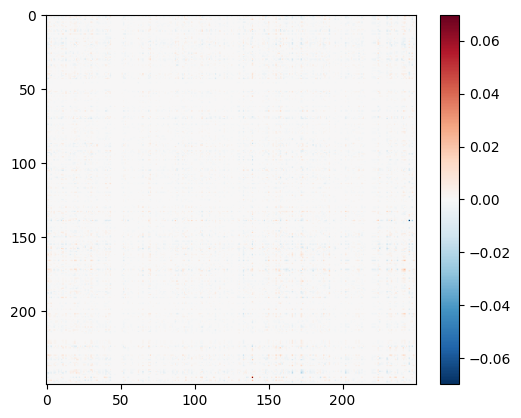

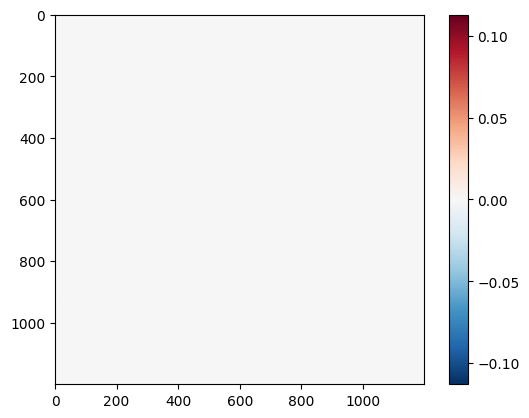

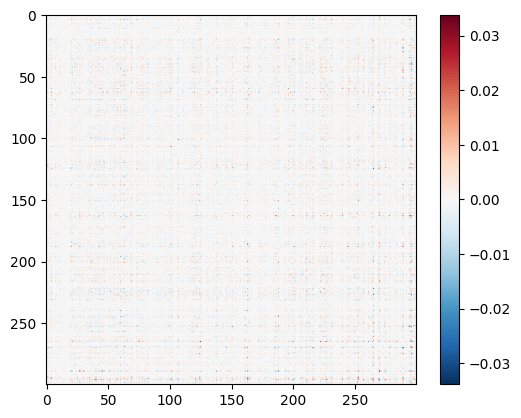

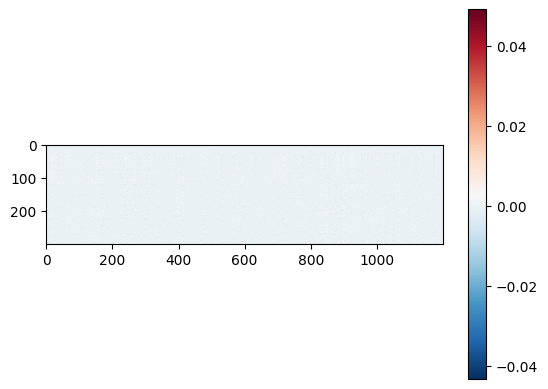

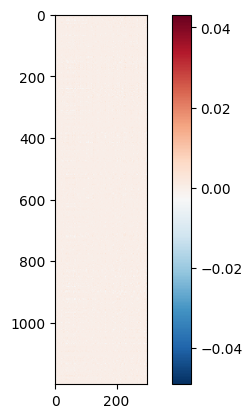

In [10]:
display.matrix(L[:250, :250], 'RdBu_r')
display.matrix(L[:model.rsnn.excitatory, :model.rsnn.excitatory], 'RdBu_r')
display.matrix(L[model.rsnn.excitatory:, model.rsnn.excitatory:], 'RdBu_r')
display.matrix(L[model.rsnn.excitatory:, :model.rsnn.excitatory],'RdBu_r')
display.matrix(L[:model.rsnn.excitatory, model.rsnn.excitatory:],'RdBu_r')

In [13]:
from scipy.ndimage import gaussian_filter
gaussian_spikes_1 = gaussian_filter(spikes[:, 0], sigma=1, axes=0)
gaussian_spikes_01 = gaussian_filter(spikes[:, 0], sigma=0.1, axes=0)
gaussian_spikes_001 = gaussian_filter(spikes[:, 0], sigma=0.01, axes=0)

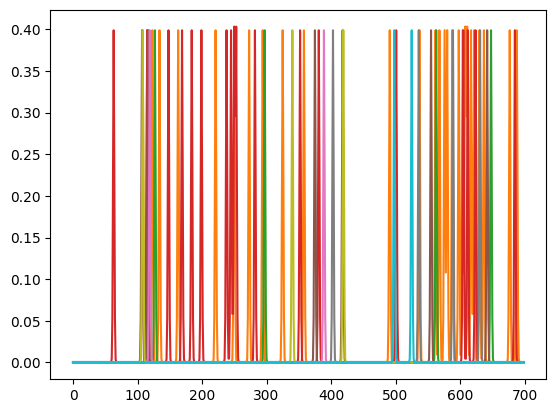

In [14]:
for n in range(10):
    plt.plot(gaussian_spikes_1[:, n])

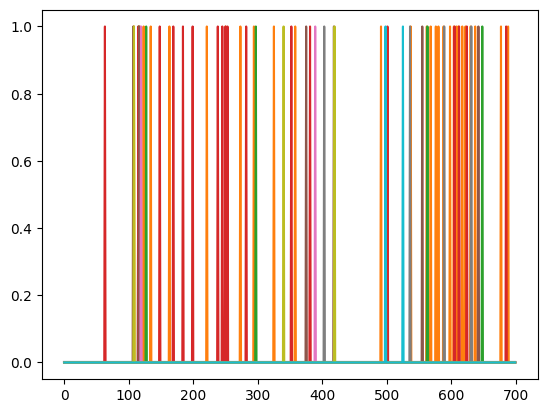

In [16]:
for n in range(10):
    plt.plot(gaussian_spikes_01[:, n])

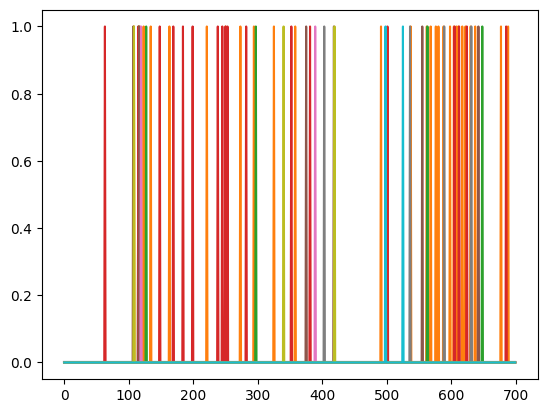

In [17]:
for n in range(10):
    plt.plot(gaussian_spikes_001[:, n])

In [19]:
L_1 = lead_matrix(gaussian_spikes_1.T)
L_01 = lead_matrix(gaussian_spikes_01.T)
L_001 = lead_matrix(gaussian_spikes_001.T)

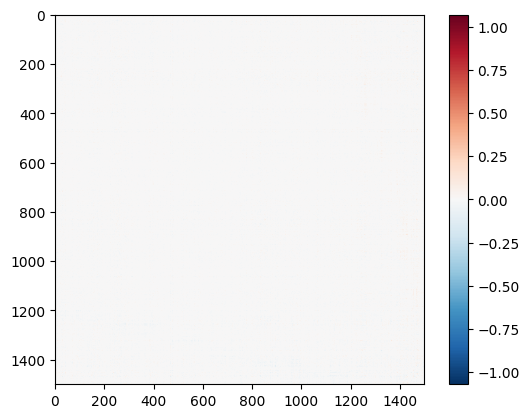

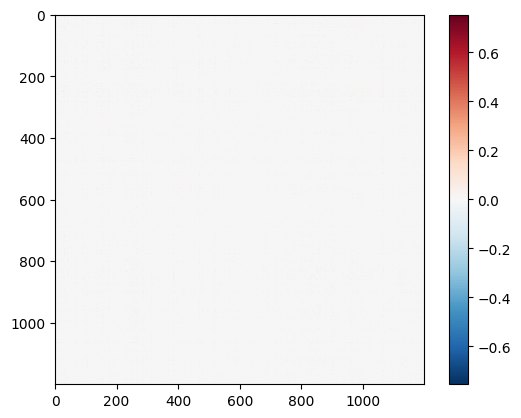

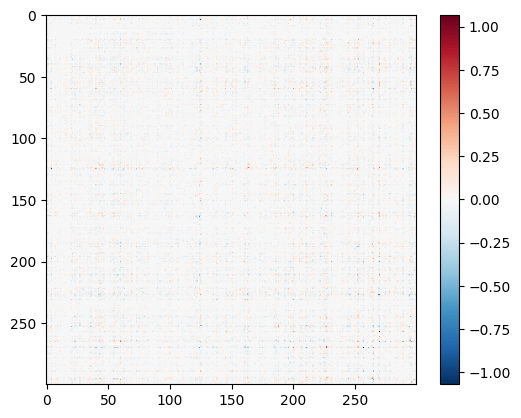

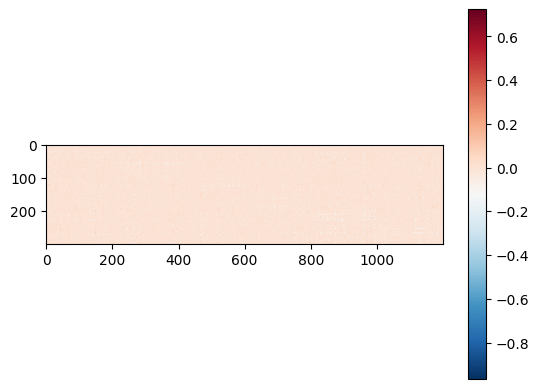

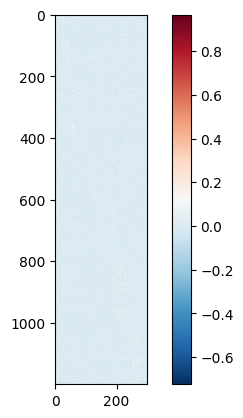

In [21]:
display.matrix(L_1, 'RdBu_r')
display.matrix(L_1[:model.rsnn.excitatory, :model.rsnn.excitatory], 'RdBu_r')
display.matrix(L_1[model.rsnn.excitatory:, model.rsnn.excitatory:], 'RdBu_r')
display.matrix(L_1[model.rsnn.excitatory:, :model.rsnn.excitatory],'RdBu_r')
display.matrix(L_1[:model.rsnn.excitatory, model.rsnn.excitatory:],'RdBu_r')

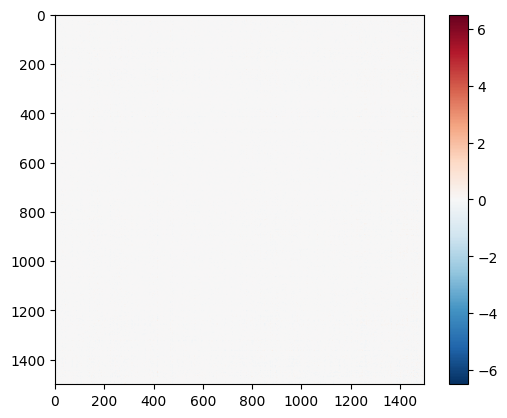

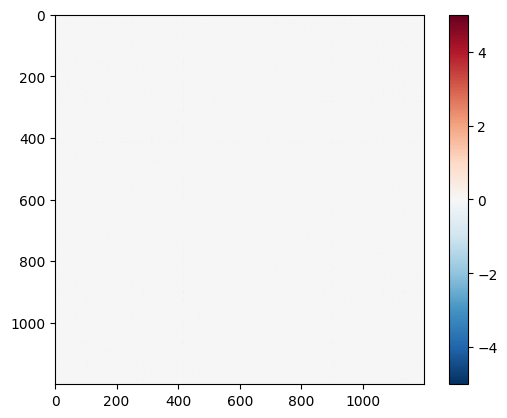

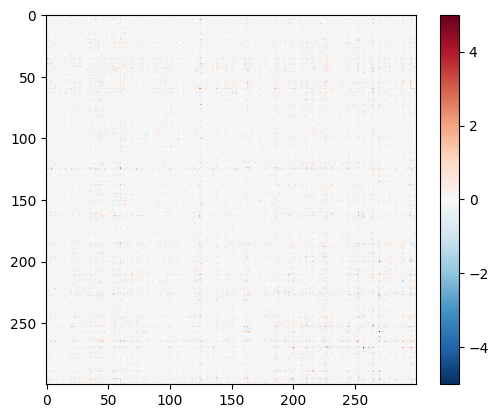

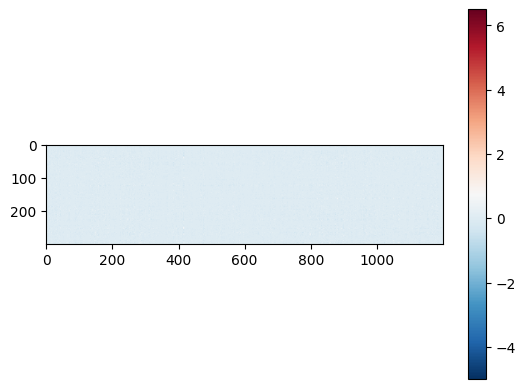

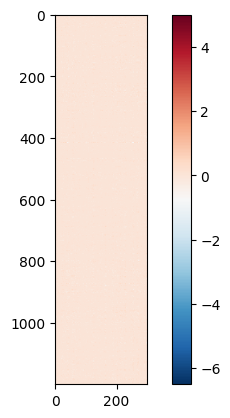

In [22]:
display.matrix(L_01, 'RdBu_r')
display.matrix(L_01[:model.rsnn.excitatory, :model.rsnn.excitatory], 'RdBu_r')
display.matrix(L_01[model.rsnn.excitatory:, model.rsnn.excitatory:], 'RdBu_r')
display.matrix(L_01[model.rsnn.excitatory:, :model.rsnn.excitatory],'RdBu_r')
display.matrix(L_01[:model.rsnn.excitatory, model.rsnn.excitatory:],'RdBu_r')

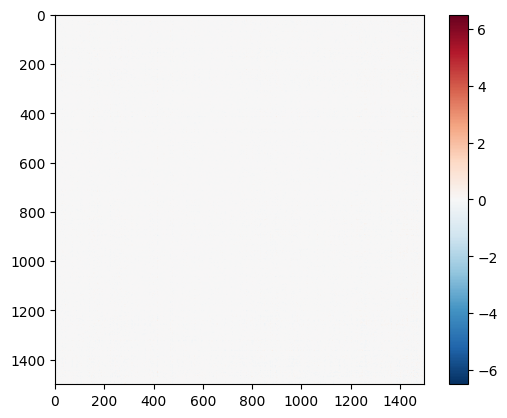

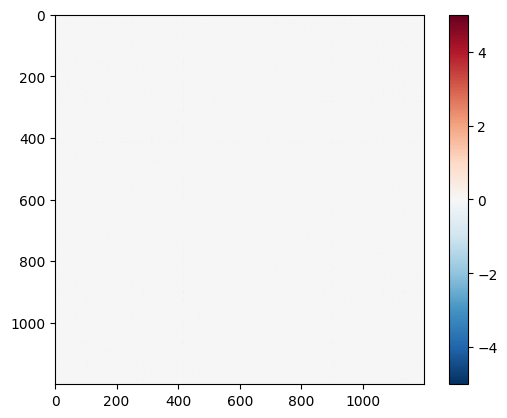

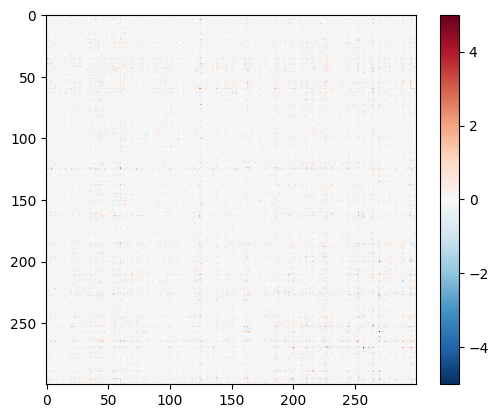

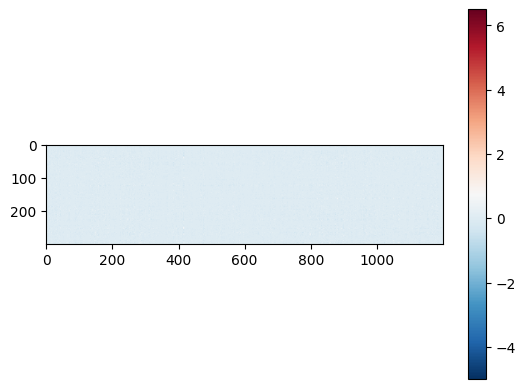

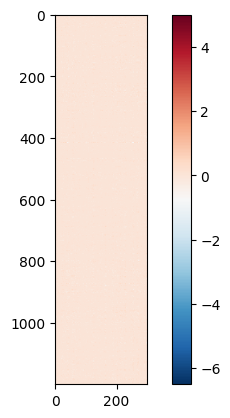

In [23]:
display.matrix(L_001, 'RdBu_r')
display.matrix(L_001[:model.rsnn.excitatory, :model.rsnn.excitatory], 'RdBu_r')
display.matrix(L_001[model.rsnn.excitatory:, model.rsnn.excitatory:], 'RdBu_r')
display.matrix(L_001[model.rsnn.excitatory:, :model.rsnn.excitatory],'RdBu_r')
display.matrix(L_001[:model.rsnn.excitatory, model.rsnn.excitatory:],'RdBu_r')

In [25]:
# sigma should represent around 10ms (tau membrane) hence in dt = 2ms, that's 5 bins
gaussian_spikes_5 = gaussian_filter(spikes[:, 0], sigma=5, axes=0)
L_5 = lead_matrix(gaussian_spikes_5.T)

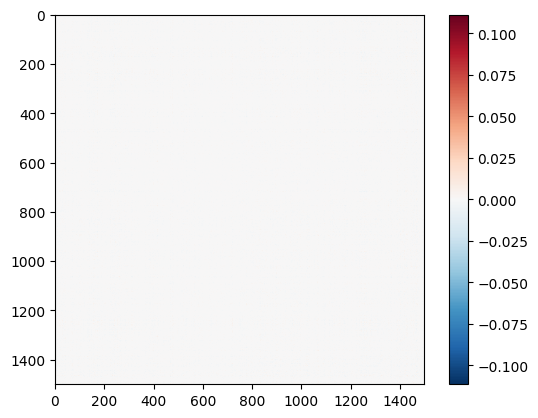

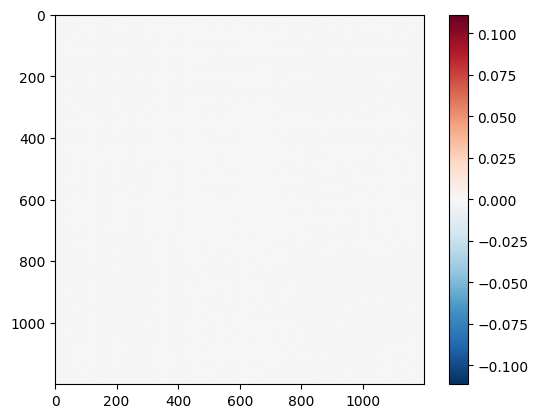

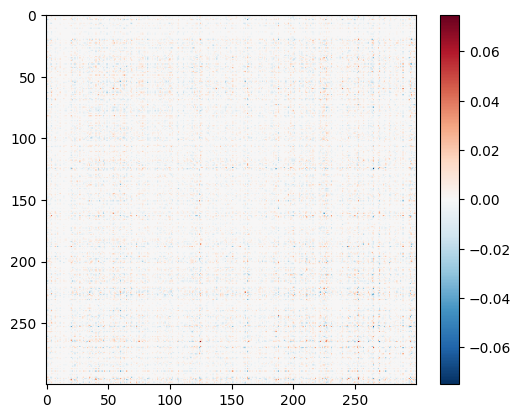

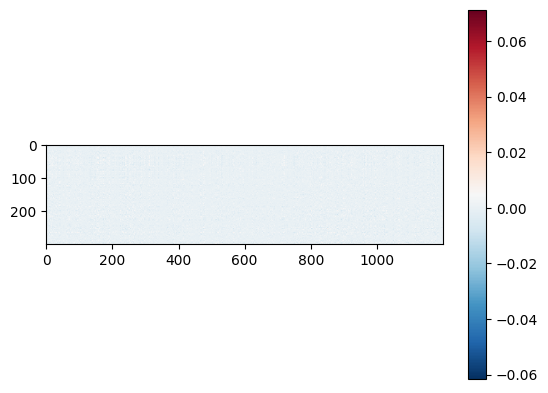

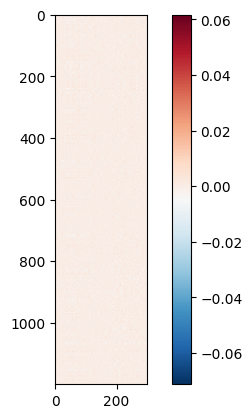

In [26]:
display.matrix(L_5, 'RdBu_r')
display.matrix(L_5[:model.rsnn.excitatory, :model.rsnn.excitatory], 'RdBu_r')
display.matrix(L_5[model.rsnn.excitatory:, model.rsnn.excitatory:], 'RdBu_r')
display.matrix(L_5[model.rsnn.excitatory:, :model.rsnn.excitatory],'RdBu_r')
display.matrix(L_5[:model.rsnn.excitatory, model.rsnn.excitatory:],'RdBu_r')

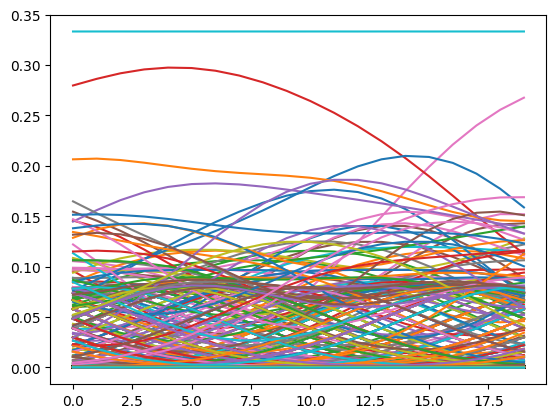

In [29]:
for n in range(gaussian_spikes_5.shape[1]):
    plt.plot(gaussian_spikes_5[200:220, n])

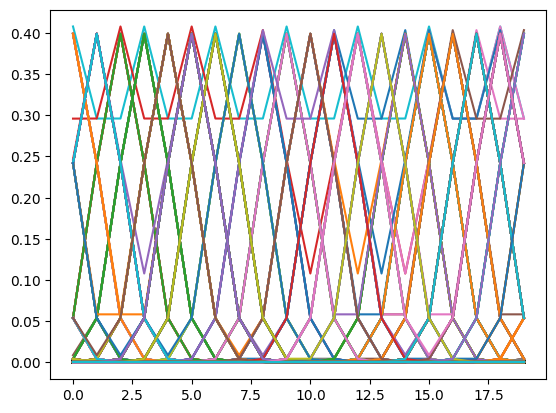

In [33]:
for n in range(gaussian_spikes_1.shape[1]):
    plt.plot(gaussian_spikes_1[200:220, n])

In [27]:
# sigma should represent around 10ms (tau membrane) hence in dt = 2ms, that's 5 bins
L_5_excerpt = lead_matrix(gaussian_spikes_5[200:220].T)

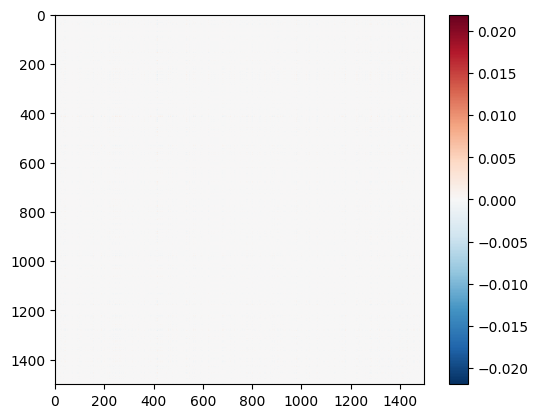

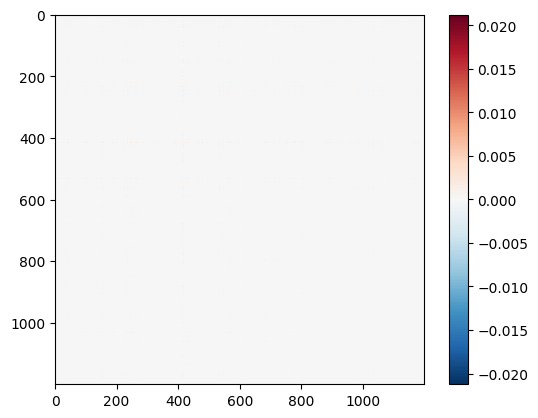

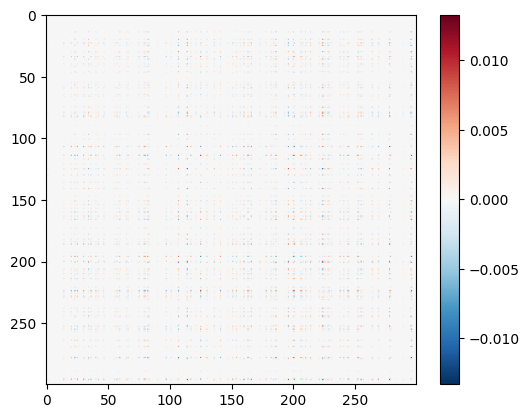

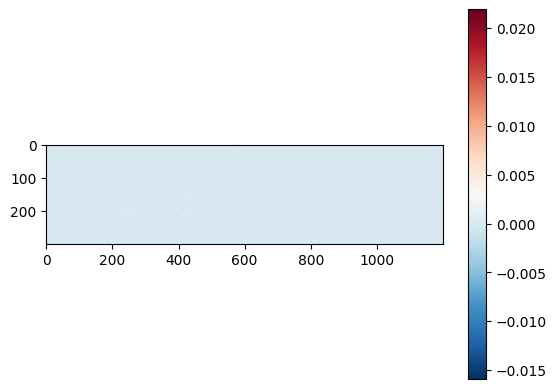

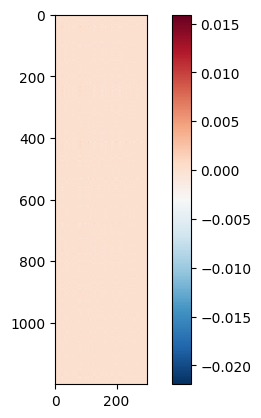

In [37]:
display.matrix(L_5_excerpt, 'RdBu_r')
display.matrix(L_5_excerpt[:model.rsnn.excitatory, :model.rsnn.excitatory], 'RdBu_r')
display.matrix(L_5_excerpt[model.rsnn.excitatory:, model.rsnn.excitatory:], 'RdBu_r')
display.matrix(L_5_excerpt[model.rsnn.excitatory:, :model.rsnn.excitatory],'RdBu_r')
display.matrix(L_5_excerpt[:model.rsnn.excitatory, model.rsnn.excitatory:],'RdBu_r')

In [48]:
fired_in_excerpt = spikes[200:220, 0].sum(axis=0) > 0
print(np.arange(1500)[fired_in_excerpt])
excitatory_mask_fired = np.arange(1500)[fired_in_excerpt] < model.rsnn.excitatory

[  10   11   21   26   32   34   40   43   70   89   94   98  101  104
  105  113  139  144  150  155  157  158  162  172  178  187  188  213
  221  224  232  235  236  241  245  247  252  261  262  267  268  269
  270  278  283  285  288  296  314  319  338  349  361  362  363  378
  385  387  405  408  410  412  413  415  416  417  439  441  451  460
  476  479  492  495  530  533  538  545  546  552  556  561  562  566
  570  584  588  593  595  596  597  599  622  624  633  641  649  653
  655  661  678  680  684  689  713  714  728  749  751  753  758  759
  776  777  780  784  792  798  800  802  805  821  827  833  850  852
  858  872  874  880  886  889  892  896  899  914  923  927  928  933
  960  964  970  978  979  980  982  987  992 1000 1001 1017 1020 1032
 1033 1054 1058 1063 1064 1073 1087 1088 1090 1112 1113 1130 1132 1135
 1154 1173 1177 1178 1180 1201 1214 1220 1223 1225 1230 1234 1236 1240
 1242 1252 1255 1257 1259 1260 1266 1275 1279 1280 1282 1297 1301 1305
 1307 

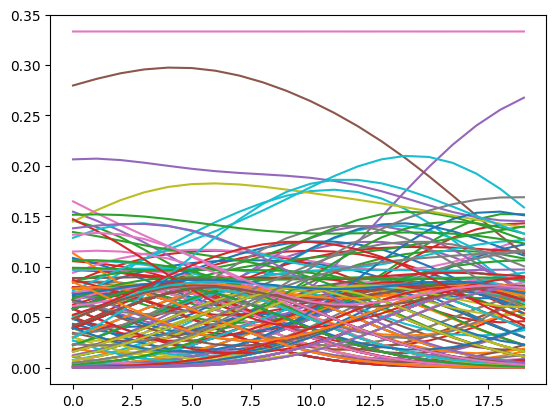

In [36]:
for n in np.arange(1500)[fired_in_excerpt]:
    plt.plot(gaussian_spikes_5[200:220, n])

In [38]:
L_5_excerpt_fired = lead_matrix(gaussian_spikes_5[200:220, fired_in_excerpt].T)

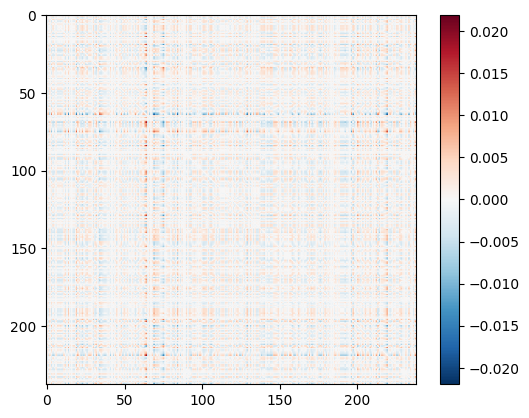

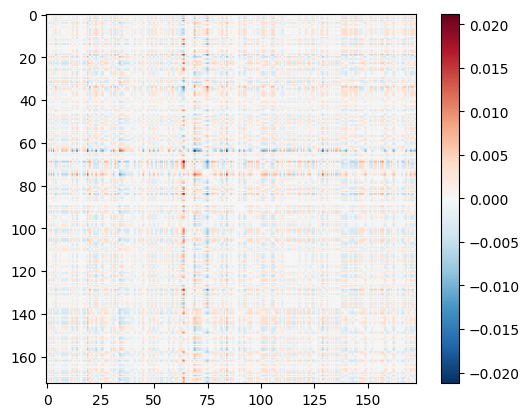

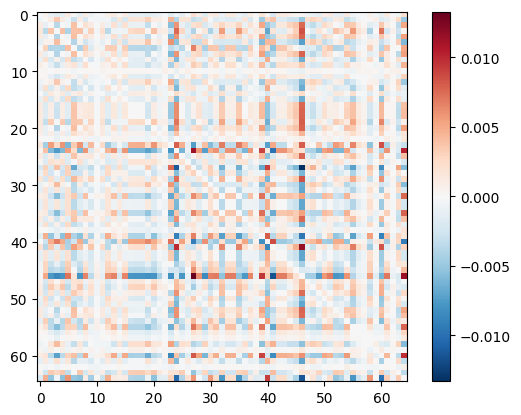

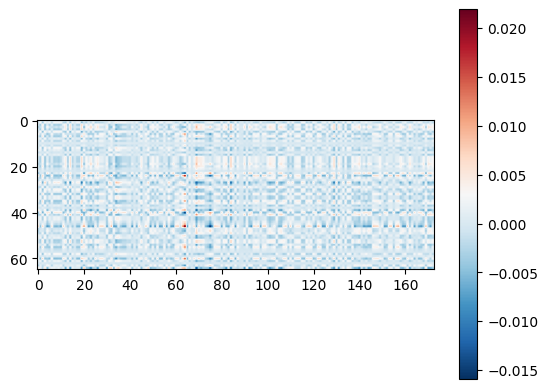

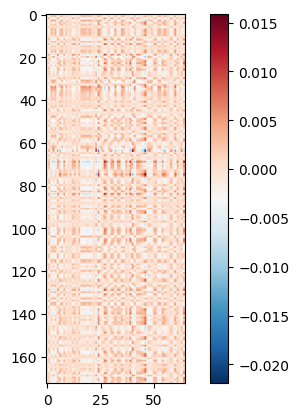

In [55]:
display.matrix(L_5_excerpt_fired, 'RdBu_r')
display.matrix(L_5_excerpt_fired[excitatory_mask_fired][:,excitatory_mask_fired].squeeze(), 'RdBu_r')
display.matrix(L_5_excerpt_fired[~excitatory_mask_fired][:,~excitatory_mask_fired].squeeze(), 'RdBu_r')
display.matrix(L_5_excerpt_fired[~excitatory_mask_fired][:,excitatory_mask_fired].squeeze(),'RdBu_r')
display.matrix(L_5_excerpt_fired[excitatory_mask_fired][:,~excitatory_mask_fired].squeeze(),'RdBu_r')

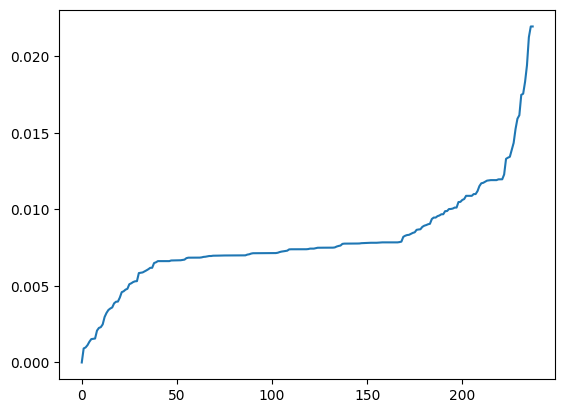

In [56]:
approx_leadlag_neuron_excerpt_fired = np.max(np.abs(L_5_excerpt_fired), axis=1)
plt.plot(np.sort(approx_leadlag_neuron_excerpt_fired))

In [69]:
local_idx_leader, local_idx_follower = np.unravel_index(np.argmax(np.abs(L_5_excerpt_fired)), L_5_excerpt_fired.shape)
idx_leader = np.arange(1500)[fired_in_excerpt][local_idx_leader]
idx_follower = np.arange(1500)[fired_in_excerpt][local_idx_follower]

In [70]:
print(L_5_excerpt_fired[local_idx_leader, local_idx_follower])
print(model.rsnn.excitatory_index[idx_leader])
print(model.rsnn.excitatory_index[idx_follower])
print(model.rsnn.area_index[idx_leader])
print(model.rsnn.area_index[idx_follower])

-0.021934568881988525
tensor(True)
tensor(False)
tensor(2)
tensor(4)


In [71]:
w_rec[idx_follower, idx_leader] # leader -> follower

np.float32(1e-12)

In [72]:
w_rec[idx_leader, idx_follower] # follower -> leader

np.float32(-0.0)

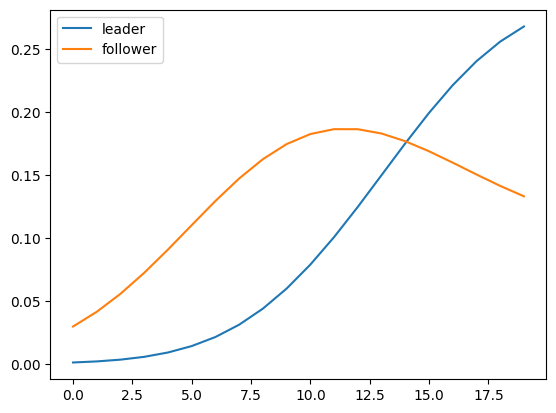

In [74]:
plt.plot(gaussian_spikes_5[200:220, idx_leader], label='leader')
plt.plot(gaussian_spikes_5[200:220, idx_follower], label='follower')
plt.legend()

In [79]:
idx_strong_leadlag_neuron = np.where(approx_leadlag_neuron_excerpt_fired > 0.01)
idx_mid_leadlag_neuron = np.where((approx_leadlag_neuron_excerpt_fired > 0.005) * (approx_leadlag_neuron_excerpt_fired <= 0.01))

In [82]:
np.arange(1500)[fired_in_excerpt][idx_strong_leadlag_neuron]

array([  26,  101,  105,  155,  157,  172,  188,  235,  245,  247,  285,
        314,  387,  415,  416,  460,  476,  479,  533,  562,  570,  597,
        622,  680,  684,  728,  880,  889,  960, 1000, 1090, 1177, 1234,
       1307, 1314, 1325, 1360, 1366, 1386, 1396, 1400, 1424, 1455, 1478,
       1496])

In [83]:
np.arange(1500)[fired_in_excerpt][idx_mid_leadlag_neuron]

array([  10,   11,   21,   32,   34,   40,   43,   70,   89,   94,   98,
        104,  113,  144,  150,  158,  162,  178,  187,  213,  221,  232,
        236,  241,  252,  261,  262,  268,  269,  278,  283,  296,  319,
        338,  349,  361,  362,  363,  378,  385,  405,  408,  410,  412,
        413,  417,  439,  451,  492,  495,  530,  538,  545,  546,  552,
        556,  561,  566,  584,  588,  593,  599,  624,  633,  641,  649,
        653,  655,  661,  678,  689,  713,  714,  749,  751,  753,  758,
        759,  776,  777,  780,  784,  792,  798,  800,  802,  805,  821,
        827,  833,  850,  852,  858,  872,  874,  886,  896,  899,  914,
        923,  927,  928,  933,  970,  978,  979,  980,  982,  987,  992,
       1017, 1020, 1032, 1033, 1054, 1058, 1063, 1064, 1073, 1087, 1088,
       1113, 1132, 1135, 1154, 1173, 1178, 1180, 1214, 1220, 1223, 1225,
       1230, 1236, 1240, 1242, 1255, 1257, 1259, 1266, 1275, 1279, 1280,
       1282, 1297, 1317, 1330, 1341, 1351, 1354, 13

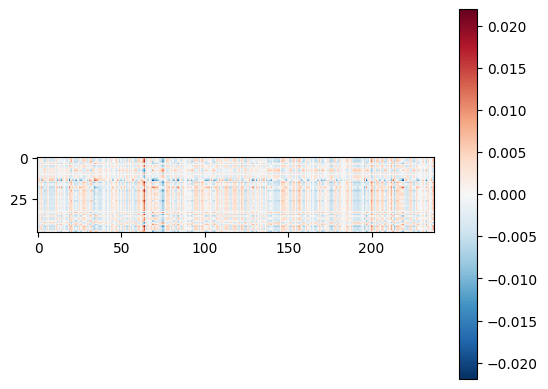

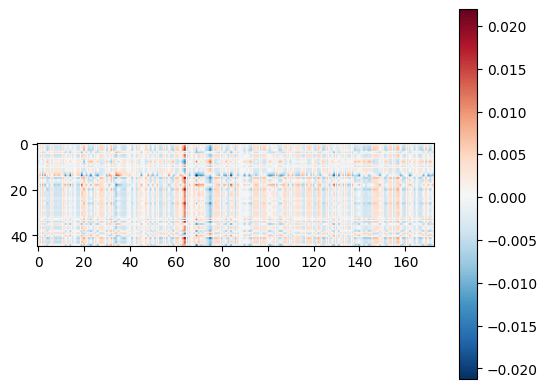

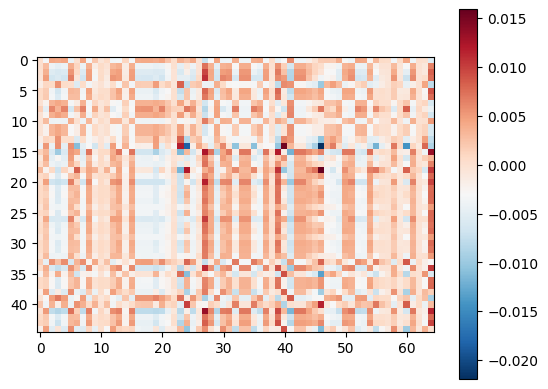

In [88]:
display.matrix(L_5_excerpt_fired[idx_strong_leadlag_neuron].squeeze(), 'RdBu_r')
display.matrix(L_5_excerpt_fired[idx_strong_leadlag_neuron][:,excitatory_mask_fired].squeeze(), 'RdBu_r')
display.matrix(L_5_excerpt_fired[idx_strong_leadlag_neuron][:,~excitatory_mask_fired].squeeze(), 'RdBu_r')

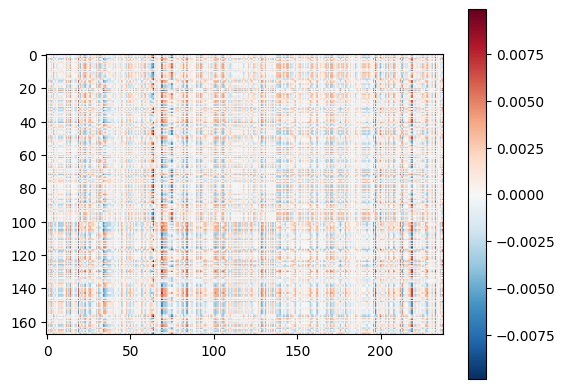

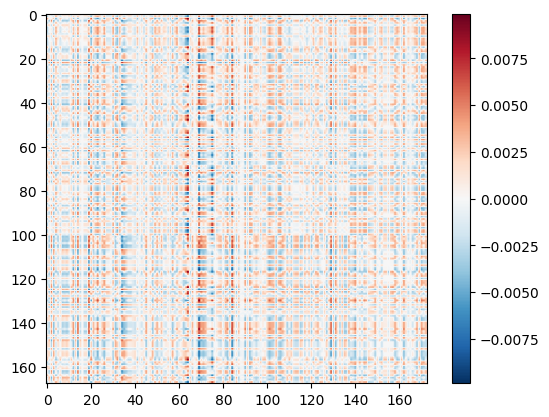

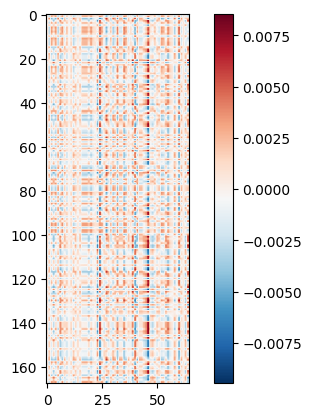

In [89]:
display.matrix(L_5_excerpt_fired[idx_mid_leadlag_neuron].squeeze(), 'RdBu_r')
display.matrix(L_5_excerpt_fired[idx_mid_leadlag_neuron][:,excitatory_mask_fired].squeeze(), 'RdBu_r')
display.matrix(L_5_excerpt_fired[idx_mid_leadlag_neuron][:,~excitatory_mask_fired].squeeze(), 'RdBu_r')

In [90]:
sent_connectivity = []
received_connectivity = []
for idx in idx_strong_leadlag_neuron[0]:
    other_idx = np.argmax(np.abs(L_5_excerpt_fired[idx]))
    sent_connectivity += [w_rec[other_idx, idx]]
    received_connectivity += [w_rec[idx, other_idx]]
    
sent_connectivity = np.array(sent_connectivity)
received_connectivity = np.array(received_connectivity)

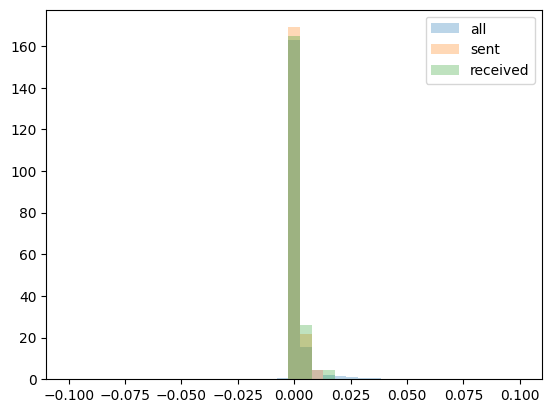

In [99]:
bins = np.linspace(-0.1, 0.1, 40)
plt.hist(w_rec.flatten(), bins=bins, alpha=0.3, label='all', density=True)
plt.hist(sent_connectivity, bins=bins, alpha=0.3, label='sent', density=True)
plt.hist(received_connectivity, bins=bins, alpha=0.3, label='received', density=True)
plt.legend()

In [103]:
for s, r, idx in zip(sent_connectivity, received_connectivity, idx_strong_leadlag_neuron[0]):
    if np.abs(s) > 0.01 or np.abs(r) > 0.01:
        print(s, r, np.max(np.abs(L_5_excerpt_fired[idx])))

0.011721094 0.0018151428 0.011959624476730824
1e-12 0.015713347 0.011870857328176498


In [104]:
for s, r, idx in zip(sent_connectivity, received_connectivity, idx_strong_leadlag_neuron[0]):
    if np.abs(s) > 0.005 or np.abs(r) > 0.005:
        print(s, r, np.max(np.abs(L_5_excerpt_fired[idx])))

0.011721094 0.0018151428 0.011959624476730824
0.0052421237 1e-12 0.010016010142862797
1e-12 0.0072287023 0.010608971118927002
1e-12 0.015713347 0.011870857328176498
0.0011391019 0.005937069 0.011905157938599586
